### 微分方程式を用いた現象モデリング  

※ 本投稿の内容はThomas Judsonの『The Ordinary Differential Equations Project』から多くの部分を引用しています。

微分方程式とは、方程式に微分係数が含まれているものを指します。このとき、微分係数の微分回数は1回にとどまらず、複数回繰り返される場合もあります。

最も簡単な1階微分方程式（first-order differential equation）の形式は次のようになります。

$$
\frac{dy}{dx} = f(x, y) \tag{1}
$$

今回は、式(1)のような微分方程式がどのようにして導かれるかを丁寧に見ていきます。

### 指数関数的成長  
微分とは「変化」に関する数学的な記述です。変化を想像しやすい例の1つに「成長」がありますが、人口成長の例を使って微分方程式の形を導き出してみましょう。

人口は指数関数的に成長します。この表現は難しいですが、もっと分かりやすく考えると次のように言い換えられます。

人間は、人口の一部が出生し、人口の一部が死亡することで成長します。

そうすると、人口の成長量は

$$
成長人口数 = 出生人口数 - 死亡人口数 \tag{2}
$$

と表すことができます。

ここで、時間について考えていないことに気づきます。重要なポイントは、私たちは「単位時間あたりの成長量」について考える必要があるということです。これを無視してはなりません。

もしも式(2)の成長量が100万年の間の成長なのか、それとも1年間の成長なのか明記しないと、どのような意味があるでしょうか？

したがって、式(2)を次のように修正します。

$$
特定時間の成長人口数 = 単位時間あたりの出生人口数 \cdot 特定時間 - 死亡人口数 \cdot 特定時間 \tag{3}
$$

式(3)はやや冗長で、言葉で書かれています。これを数学的に表現し直しましょう。

単位時間あたりの出生人口数は現在の人口に比例します。なぜなら、現在の生存人口の一部だけが出生することが分かるからです。単位時間あたりの死亡人口数も現在の人口に比例すると簡単に推測できます。

時間に対する人口を $P(t)$ とし、特定の時間に成長した人口数を $\Delta P$ としましょう。また、出生率を $k_{birth}$、死亡率を $k_{death}$ とすると、以下の式が得られます。

$$
\Delta P \approx k_{birth} P(t) \Delta t - k_{death} P(t) \Delta t \tag{4}
$$

式(4)を少し変えて、$k = k_{birth} - k_{death}$ とすると、

$$
\Delta P \approx k P(t) \Delta t \tag{5}
$$

となります。両辺を $\Delta t$ で割ると、以下の式が得られます。

$$
\frac{\Delta P}{\Delta t} \approx k P(t) \tag{6}
$$

式(6)の意味は、単位時間あたりの人口変化は現在の人口に比例するということです。

式(6)において $\Delta t$ を非常に小さくすると、微分方程式が得られます。

$$
\lim_{\Delta t \to 0} \frac{\Delta P}{\Delta t} = \frac{dP}{dt} \tag{7}
$$

したがって、

$$
\frac{dP}{dt} = kP \tag{8}
$$

この式は、式(1)で示された微分方程式の形と同じであることがわかります。

式(8)の微分方程式の解は次の通りです。

$$
P(t) = Ce^{kt} \tag{9}
$$

式(9)を式(8)に再び代入すると、

$$
Cke^{kt} = kCe^{kt} \tag{10}
$$

が成り立つことがわかります。

ここで、もし初期の人口数がわかっていれば、式(9)の $C$ の値を特定することができます。

例えば、$t = 0$ のときの人口数が $P_0$ であれば、

$$
P(t) = P_0 e^{kt} \tag{11}
$$

とすることができます。


### ロジスティック成長 (Logistic Growth)

「人口は指数関数的に成長する」とはよく聞くかもしれませんが、実際には人口成長には限界があります。最近の韓国では出生率の低下が問題となっており、この成長率の傾向では将来的に人口が減少することは避けられないと見られています。

では、なぜ人口は無限に増え続けることができないのでしょうか？

それは資源に限りがあるからです。ペトリ皿に入ったバクテリアは、いくら数が増えても皿の大きさを超えることはできないのと同じです。




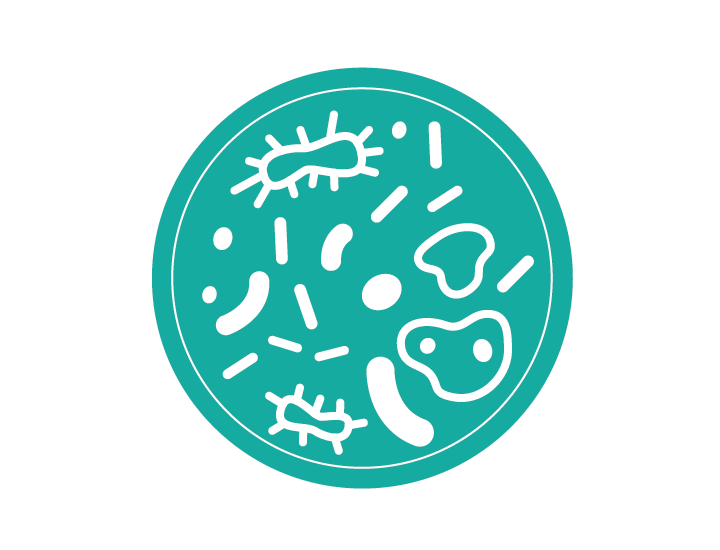
#### 図1. ペトリ皿内のバクテリアは、個体数に限界があり、ロジスティック成長の形で成長していく。



式 (8) を少し修正して、成長の最大値に近づくほど成長が鈍化するモデルを作りましょう。

$$
\frac{dP}{dt} = kP\left(1 - \frac{P}{N}\right) \tag{12}
$$

ここで、式 (8) に $\left(1 - \frac{P}{N}\right)$ という関数を付け加えました。この $N$ は最大成長値を表しており、式 (12) が示すのは、人口の変化量が $P$ が $N$ に近づくほど 0 に近づくという意味です。なぜなら、$\left(1 - \frac{P}{N}\right)$ は $P = 0$ のときには 1 ですが、$P$ が $N$ に近づくほど 0 に近づくからです。

このモデルの解は以下のように知られています。

$$
P = \frac{N}{Ce^{-kt} + 1} \tag{13}
$$

（式 (13) が式 (12) の解であることを確認してみてください。）

$N$、$C$、$k$ に適切な値を代入すると、グラフの形は次のようになります。以下のグラフでは、$N = 1000$ という値を使用しています。これは、最大収容人口が1000であることを意味します。したがって、時間が経つにつれて人口は1000に収束し、その後は変化しないことがわかります。



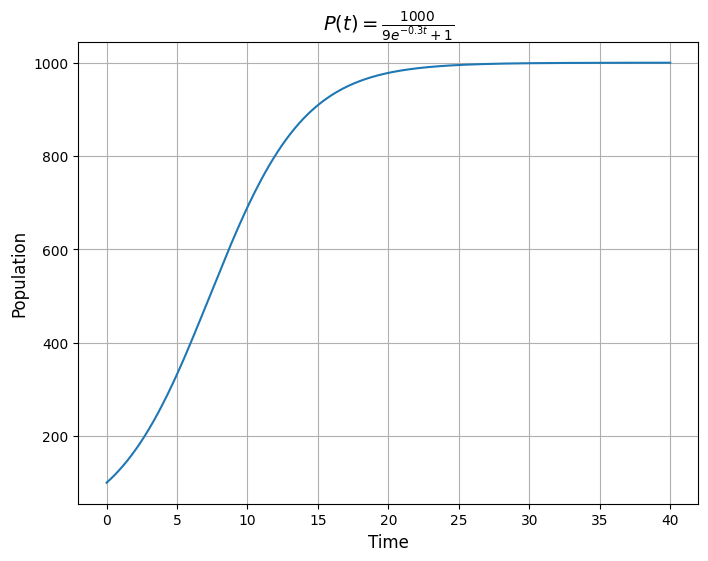

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 時間の範囲を設定
t = np.linspace(0, 40, 400)

# 関数 P(t) を定義
P_t = 1000 / (9 * np.exp(-0.3 * t) + 1)

# グラフの描画
plt.figure(figsize=(8, 6))
plt.plot(t, P_t, label=r'$P(t) = \frac{1000}{9e^{-0.3t} + 1}$')

# ラベルの設定
plt.xlabel('Time', fontsize=12)
plt.ylabel('Population', fontsize=12)
plt.title(r'$P(t) = \frac{1000}{9e^{-0.3t} + 1}$', fontsize=14)

# グリッドを表示
plt.grid(True)

# グラフの表示
plt.show()


#### 図2. ロジスティック成長の例のグラフ



---

### バネの動きに関する現象

#### 減衰のないバネ質量系 (Undamped Spring-Mass System)

フックの法則として知られているバネの動きに関する式は次の通りです。

$$
F = -kx \tag{14}
$$

ここで、負の符号が付いているのは、バネが伸びた方向と、このときに働く力の方向が反対であることを意味しています。

この関係式は、次のような現象を観察して得られた事実に基づいています。



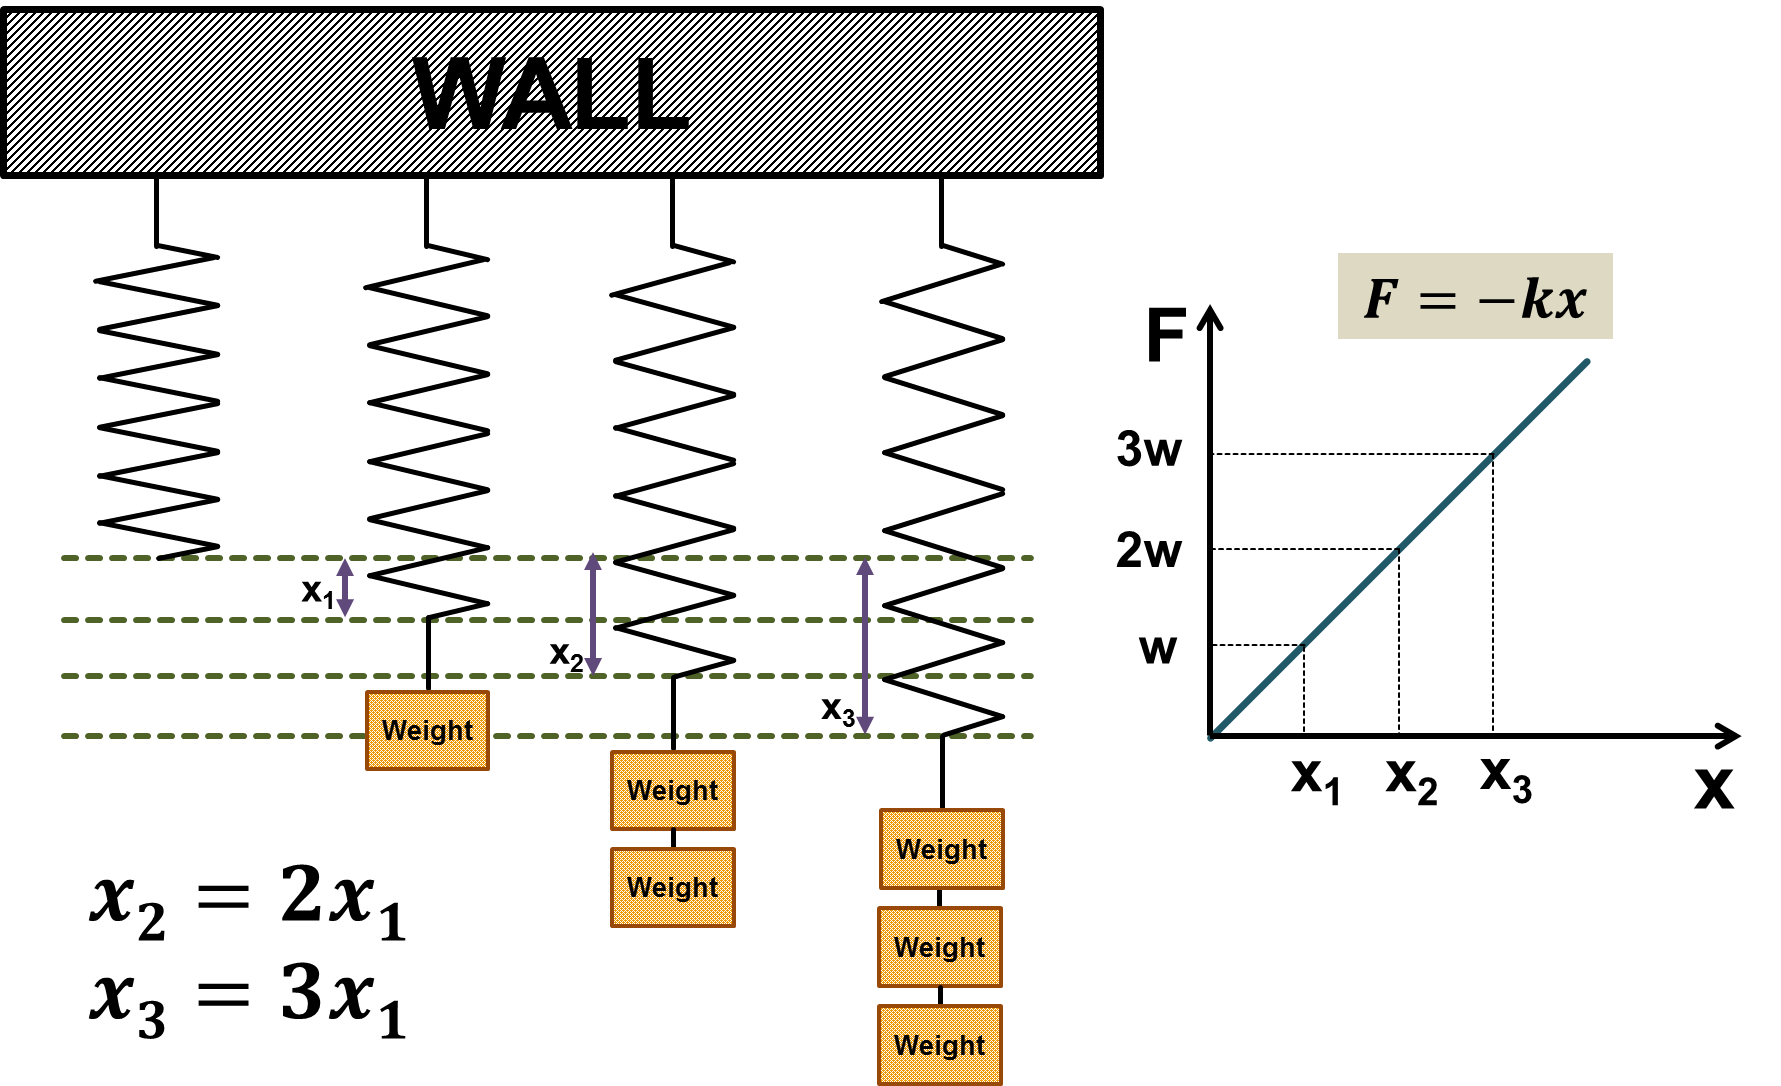

#### 図3. フックの法則の実験
図の出典: フックの法則 - Wikipedia



図3が示すように、バネは引っ張られた長さに比例して弾性力が作用することが実験的に確認され、この現象が式 (14) で説明されています。

それでは、式 (14) が微分方程式といえるでしょうか？ 力は質量 $m$ と加速度 $a$ の積として表せるので、式 (14) を次のように書き直すことができます。

$$
m\frac{d^2x}{dt^2} = -kx \tag{15}
$$

したがって、式 (15) から、フックの法則は 2階の微分方程式であることがわかります。

この微分方程式の解は以下の通りです。

$$
x(t) = A\cos(t) + B\sin(t) \tag{16}
$$

もし $m = 1$ で $k = 1$ とし、初期条件が $x(0) = 0$、$x'(0) = 1$ と与えられた場合、式 (16) は

$$
x(t) = \sin(t) \tag{17}
$$

となります。

フックの法則から導かれるこの動きは、通常「減衰のないバネ質量系」(undamped spring-mass system) の動きと呼ばれ、時には「調和運動」(harmonic motion) とも呼ばれます。



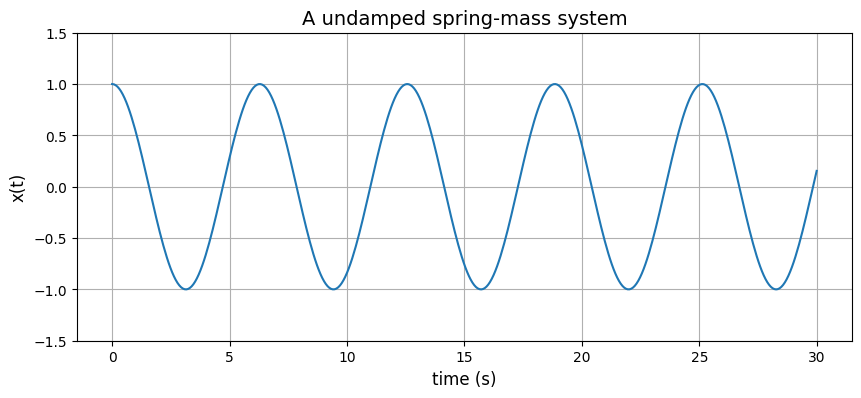

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 時間の範囲を設定
t = np.linspace(0, 30, 400)

# ばね-質量システムの振動 (正弦波) を定義
x_t = np.cos(t)

# グラフの描画
plt.figure(figsize=(10, 4))
plt.plot(t, x_t)

# ラベルの設定
plt.xlabel('time (s)', fontsize=12)
plt.ylabel('x(t)', fontsize=12)
plt.title('A undamped spring-mass system', fontsize=14)

# グリッドを表示
plt.grid(True)

# y軸の範囲設定
plt.ylim([-1.5, 1.5])

# グラフの表示
plt.show()




#### 図4. 減衰がないと仮定した場合のバネの動きは、正弦関数で表されます。



---

### 減衰のあるバネ質量系 (Damped Spring-Mass System)

減衰運動 (damped motion) について考える前に、減衰 (damping) とは何かを考えてみましょう。減衰とは、物体が速く動くほど、逆方向に大きな力が働くシステムのことです。

ドアを急に引いたり、閉めたりしたとき、ドアがゆっくり動くように逆方向に力がかかる場合や、物体が落ちるときにゆっくり落下させるために使われる装置が「ダッシュポット」(dashpot) です。

ダッシュポットが与える減衰運動は、速度に逆らう方向に与えられるので、

$$
F = -b\frac{dx}{dt} \quad (\text{ただし} \, b > 0) \tag{18}
$$

と表すことができます。

したがって、もともとの式 (14) に減衰運動に関する式を追加すると、次のように変形されます。

$$
F = -kx - b\frac{dx}{dt} \tag{19}
$$

または

$$
m\frac{d^2x}{dt^2} = -kx - b\frac{dx}{dt} \tag{20}
$$

これをさらに整理すると、

$$
m\frac{d^2x}{dt^2} + b\frac{dx}{dt} + kx = 0 \tag{21}
$$

となります。このようなモデルを「単純減衰調和振動子」(simple damped harmonic oscillator) と呼びます。

続きの内容は次に

説明しますが、現時点ではこの微分方程式の解が次のような形になると仮定して問題を解いてみましょう。

$$
x(t) = e^{rt} \tag{22}
$$

この式 (22) を式 (21) に代入すると、

$$
m r^2 e^{rt} + b r e^{rt} + k e^{rt} = 0 \tag{23}
$$

となります。

#### 過減衰バネ質量系 (Over-Damped Spring-Mass System)

ここで $m = 1$、$b = 3$、$k = 2$ としましょう。すると、次のようになります。

$$
r^2 e^{rt} + 3r e^{rt} + 2 e^{rt} = 0 \tag{24}
$$

$$
e^{rt}(r^2 + 3r + 2) = 0 \tag{25}
$$

$$
e^{rt}(r + 1)(r + 2) = 0 \tag{26}
$$

ここで、$e^{rt}$ は常に正の値なので、$r = -1$ または $r = -2$ となります。

したがって、解は次の形になります。

$$
x(t) = A e^{-t} + B e^{-2t} \tag{27}
$$

初期値が次のように与えられた場合を考えます。

$$
x(0) = 0 \tag{28}
$$

$$
x'(0) = 1 \tag{29}
$$

これにより、次のように $A$ と $B$ の値を計算できます。

$$
x(0) = A + B = 0 \tag{30}
$$

$$
x'(t) = (-1)A e^{-t} + (-2)B e^{-2t} \tag{31}
$$

$$
x'(0) = -A - 2B = 1 \tag{32}
$$

したがって、$A = 1$、$B = -1$ となります。

したがって、解は次のようになります。

$$
x(t) = e^{-t} - e^{-2t} \tag{34}
$$

この解 (34) をグラフに描くと次のようになります。



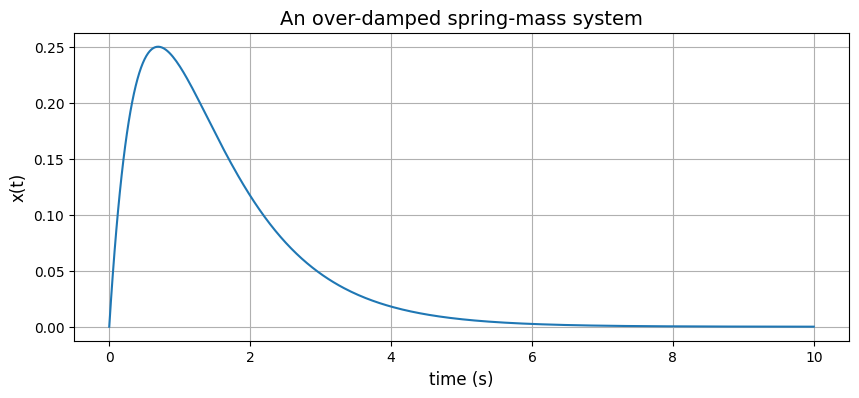

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 時間の範囲を設定
t = np.linspace(0, 10, 400)

# 関数 x(t) = e^{-t} - e^{-2t}
x_t = np.exp(-t) - np.exp(-2 * t)

# グラフの描画
plt.figure(figsize=(10, 4))
plt.plot(t, x_t, label=r'$x(t) = e^{-t} - e^{-2t}$')

# ラベルの設定
plt.xlabel('time (s)', fontsize=12)
plt.ylabel('x(t)', fontsize=12)
plt.title('An over-damped spring-mass system', fontsize=14)

# グリッドを表示
plt.grid(True)

# グラフの表示
plt.show()


#### 図5. バネの力に対して減衰が大きい場合。過減衰バネ質量系の解の曲線。



---

### 減衰の小さいバネ質量系 (Under-Damped Spring-Mass System)

もし $k = 2$ ではなく、$k = 38.25$ だとしましょう。これは、バネの力が非常に強く、少しの力で大きく伸びるように設計されている場合です。つまり、減衰はバネの動きに対して小さな抵抗力として作用することを意味します。

他の条件はすべて同じと仮定して、この場合の解を考えると、

$$
r^2 e^{rt} + 3r e^{rt} + 38.25 e^{rt} = 0 \tag{35}
$$

$$
e^{rt}(r^2 + 3r + 38.25) = 0 \tag{36}
$$

この場合の解は次の通りです。

$$
x(t) = e^{-\frac{3t}{2}}\left(A \cos(6t) + B \sin(6t)\right) \tag{37}
$$

式 (28)、(29) の初期条件を再び代入すると、

$$
x(0) = A = 0 \tag{38}
$$

$$
x'(t) = \left(-\frac{3}{2}\right)e^{-\frac{3t}{2}} B \sin(6t) + e^{-\frac{3t}{2}} 6B \cos(6t) \tag{39}
$$

$$
x'(0) = 6B = 1 \tag{40}
$$

したがって、解の曲線は次のようになります。

$$
x(t) = \frac{1}{6}e^{-\frac{3t}{2}} \sin(6t) \tag{41}
$$

---



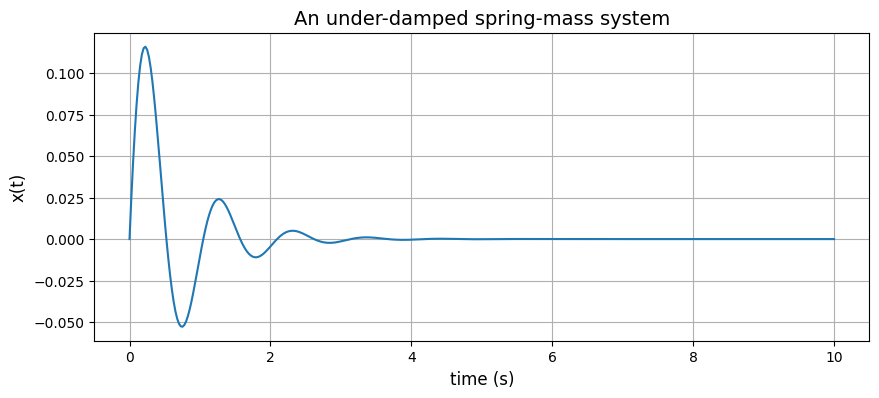

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 時間の範囲を設定
t = np.linspace(0, 10, 400)

# 関数 x(t) = (1/6) * exp(-3t/2) * sin(6t)
x_t = (1/6) * np.exp(-3*t/2) * np.sin(6*t)

# グラフの描画
plt.figure(figsize=(10, 4))
plt.plot(t, x_t, label=r'$x(t) = \frac{1}{6} e^{-\frac{3}{2}t} \sin(6t)$')

# ラベルの設定
plt.xlabel('time (s)', fontsize=12)
plt.ylabel('x(t)', fontsize=12)
plt.title('An under-damped spring-mass system', fontsize=14)

# グリッドを表示
plt.grid(True)

# グラフの表示
plt.show()


#### 図6. 減衰に比べてバネの力が強い場合。減衰の小さいバネ質量系の解の曲線。



---

### まとめ

今回のポスティングでは、いくつかの現象について微分方程式を使ってモデル化し、その解の曲線を求める過程を確認しました。

微分方程式は主に解を求める方法を学ぶ科目といえるでしょう。